In [34]:
from Models import *
from Utils import *
import warnings
# warnings.filterwarnings('ignore')

In [35]:
from gensim.models import KeyedVectors
import sentencepiece as spm

max_len = 45
enablePadding = False

sp = spm.SentencePieceProcessor()
sp.Load('/work/data/bpe/en.wiki.bpe.op50000.model')
bpe = KeyedVectors.load_word2vec_format("/work/data/bpe/en.wiki.bpe.op50000.d200.w2v.bin", binary=True)
bpe.index2word = [''] + bpe.index2word + ['<sos>'] + ['<eos>'] + ['<drop>'] # add empty string 
nb_words = len(bpe.index2word)
# word2index
bpe_dict = {bpe.index2word[i]: i for i in range(len(bpe.index2word))}
# construct embedding_matrix
embedding_matrix = np.concatenate([np.zeros((1, bpe.vector_size)), bpe.vectors, np.zeros((3, bpe.vector_size))]) # add zero vector for empty string (i.e. used for padding)

embedding_layer = Embedding(nb_words,
                    embedding_matrix.shape[-1],
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True)

In [36]:
df = pd.read_csv("/data/t-mipha/agi_encoder_recipe/datasets/query_logs/CLICKED_QQ_universal_validation.txt", sep="\t", header=None, names=['q', 'd', 'label'],usecols=[0,1,2])
df = df.dropna()
df.d = [i.split("<sep>")[0] for i in df.d.tolist()]
df.label = np.ones(len(df))

In [80]:
sts2015_df = pd.read_csv("/work/workspace/dataset-sts/data/sts/semeval-sts/all/2015.train.tsv", sep="\t", header=None, error_bad_lines=False, names=["label", "q", "d"])

In [92]:
sts2015_df = pd.read_csv("/work/workspace/dataset-sts/data/sts/semeval-sts/all/2015.test.tsv", sep="\t", names=["label", "q", "d"],  header=None, error_bad_lines=False)

In [93]:
q_sts2015_df = parse_texts_bpe(sts2015_df.q.tolist(), sp, bpe_dict, max_len, enablePadding)
d_sts2015_df = parse_texts_bpe(sts2015_df.d.tolist(), sp, bpe_dict, max_len, enablePadding)

not a string
not a string
not a string
not a string
not a string
not a string
not a string


In [22]:
%%time
df = pd.read_csv("/work/data/train_data/100M_QD_lower2.txt", nrows=100000000, usecols=[0,1,2], names=["label","q", "d"], sep="\t", header=None, error_bad_lines=False)
df = df.dropna()

CPU times: user 3min 29s, sys: 34.3 s, total: 4min 4s
Wall time: 6min 5s


In [26]:
df = df.dropna()

In [23]:
# df = df[df.label == 1]

In [38]:
%%time
enablePadding = False
q_df = parse_texts_bpe(df.q.tolist(), sp, bpe_dict, max_len, enablePadding, "post")
d_df = parse_texts_bpe(df.d.tolist(), sp, bpe_dict, max_len, enablePadding, "post")

CPU times: user 7.26 s, sys: 0 ns, total: 7.26 s
Wall time: 7.28 s


In [49]:
[len(i) for i in q_df][:5]

[6, 6, 4, 2, 6]

In [57]:
parse_texts_bpe(["best"], sp, bpe_dict, max_len, False)

array([[249]])

In [58]:
sp.EncodeAsPieces("best place to shop in bangkok")

[b'\xe2\x96\x81best',
 b'\xe2\x96\x81place',
 b'\xe2\x96\x81to',
 b'\xe2\x96\x81shop',
 b'\xe2\x96\x81in',
 b'\xe2\x96\x81bangkok']

In [76]:
tmp = []
for t in sp.EncodeAsPieces("best place to shop in bangkok"):
    if not isinstance(t, str):
        t = str(t, "utf-8")
        print(t)

    if t in bpe_dict:
        tmp.append(bpe_dict[t])
    else:
        tmp.append(bpe_dict['<unk>'])

▁best
▁place
▁to
▁shop
▁in
▁bangkok


In [70]:
def subword_tokenize(txt):

    tks = sp.EncodeAsPieces(txt)

    try:
        tks = [_.decode("utf-8") for _ in tks]
    except:
        pass

    # Split sequence of digits into chunks of 2.
    ds = []
    new_tks = []
    for tk in tks + [None]:
        if tk is not None and tk.isdigit():
            ds.append(tk)
        else:
            if len(ds) > 0:
                new_tks += list(chunks(''.join(ds),2))
                ds = []
            if tk is not None:
                new_tks.append(tk)

    # tks = [_ for _ in tks if _.encode('utf8')!=b'\xe2\x96\x81' and _.strip()!='']
    return new_tks


In [72]:
subword_tokenize("best place to shop in bangkok")

['▁best', '▁place', '▁to', '▁shop', '▁in', '▁bangkok']

In [74]:
bpe_dict['▁bangkok']

12978

In [51]:
q_df[0]

[249, 206, 8, 2844, 5, 12978]

In [55]:
bpe_dict['best']

3893

In [56]:
df.q.tolist()

['best place to shop in bangkok',
 'download funshion english version',
 'saudi aramco singapore',
 'westwood ec',
 'is bill of quantity rates binding',
 'azur crowne plaza',
 'johore house auction',
 'safra toa payoh',
 'hriq',
 'seindah takdir cinta',
 'itinerary taiwan',
 'buy and sell business singapore',
 'effects of heat on fruits',
 'bowen secondary school',
 'handheld strapping machine',
 'シドニー 観光',
 'oasia novena',
 'best world international share price',
 'one farrer park hotel',
 'watchme',
 'ep status check',
 'sunny metal',
 'singapore food brands',
 'pure pandan',
 'anchorvale cc',
 '298 tiong bahru road',
 'glass coffee table singapore',
 'what to buy in hk',
 'henry designcentre pte ltd',
 'xiaomi tv only 60hz',
 'flights from surabaya to singapore',
 'hr online moe',
 'surga yang tak dirindukan 2 online',
 'how to install iso from dreamspark',
 'bhps flickr',
 'tiong woon crane & transport pte ltd',
 '42race',
 'korea investment corporation',
 'where to go in seoul',
 

In [30]:
def addTags(x, bpe_dict, max_len):
    dec_input = np.copy(x)
    dec_output = np.copy(x)
    for i in range(len(x)):
        dec_input[i] = [bpe_dict['<sos>']] + dec_input[i] + [bpe_dict['<eos>']]
        dec_output[i] = dec_output[i] + [bpe_dict['<eos>']]

    return pad_sequences(dec_input, maxlen=max_len, padding="post"), pad_sequences(dec_output, maxlen=max_len, padding="post")

In [31]:
q_dec_inputs, q_dec_outputs = addTags(q_df, bpe_dict, max_len)
d_dec_inputs, d_dec_outputs = addTags(d_df, bpe_dict, max_len)

In [32]:
enablePadding = True
q_df = parse_texts_bpe(df.q.tolist(), sp, bpe_dict, max_len, enablePadding, "post")
d_df = parse_texts_bpe(df.d.tolist(), sp, bpe_dict, max_len, enablePadding, "post")


In [33]:
np.save("/work/data/train_data/50K_QQ_ml15.q.v.npy", q_df)
np.save("/work/data/train_data/50K_QQ_ml15.d.v.npy", d_df)
np.save("/work/data/train_data/50K_QQ_ml15.label.v.npy", df.label.values)

np.save("/work/data/train_data/50K_QQ_ml15.q.v.di.npy", q_dec_inputs)
np.save("/work/data/train_data/50K_QQ_ml15.d.v.di.npy", d_dec_inputs)

np.save("/work/data/train_data/50K_QQ_ml15.q.v.do.npy", q_dec_outputs)
np.save("/work/data/train_data/50K_QQ_ml15.d.v.do.npy", d_dec_outputs)


In [24]:
# dec_q_train = pad_sequences(pad_sequences(q_df_, maxlen=max_len+1, value=bpe_dict['<sos>']), maxlen=max_len, truncating="post")
# dec_d_train = pad_sequences(pad_sequences(d_df_, maxlen=max_len+1, value=bpe_dict['<sos>']), maxlen=max_len, truncating="post")

# np.save("/work/data/train_data/30M_QD_ml15.q_.<sos>.npy", dec_q_train)
# np.save("/work/data/train_data/30M_QD_ml15.d_.<sos>.npy", dec_d_train)

In [12]:
# np.save("/work/data/train_data/30M_QD_ml15.q.npy", q_df)
# np.save("/work/data/train_data/30M_QD_ml15.d.npy", d_df)
# np.save("/work/data/train_data/30M_QD_ml15.label.npy", df.label.values)


In [23]:
# np.save("/work/data/train_data/30M_QD_ml15.q_.npy", q_df_)
# np.save("/work/data/train_data/30M_QD_ml15.d_.npy", d_df_)

In [112]:
q_df = np.load("/work/data/train_data/30M_QD_ml15.q_.<sos>.npy")

In [113]:
q_df[0]
for i in q_df[0]:
    print(bpe.index2word[i])

<sos>
▁facebook
▁log
▁in













In [100]:
q_df

array([[50510,  7461,  4212, ...,     0,     0,     0],
       [50510,  3802, 34943, ...,     0,     0,     0],
       [50510,  1850,     8, ...,     0,     0,     0],
       ...,
       [50510,  6824,   106, ...,     0,     0,     0],
       [50510,  6455, 11146, ...,     0,     0,     0],
       [50510, 14651,  1451, ...,     0,     0,     0]], dtype=int32)

In [102]:
q_df

array([[    0,     0,     0, ...,  7461,  4212,     5],
       [    0,     0,     0, ..., 43852,  2966,  2936],
       [    0,     0,     0, ...,  1365,    89,  6772],
       ...,
       [    0,     0,     0, ...,  9597,  1136,  1523],
       [    0,     0,     0, ...,  6455, 11146, 13095],
       [    0,     0,     0, ...,   978,  1440,  1584]], dtype=int32)

In [96]:
bpe.index2word[50510]

'<sos>'

In [40]:
df_may, qrel_may = get_test_data("MayFlower", "/work/")
df_june, qrel_june = get_test_data("JuneFlower", "/work/")
df_july, qrel_july = get_test_data("JulyFlower", "/work/")

enablePadding = False

q_may = parse_texts_bpe(df_may.q.tolist(), sp, bpe_dict, max_len, enablePadding)
d_may = parse_texts_bpe(df_may.d.tolist(), sp, bpe_dict, max_len, enablePadding)

q_june = parse_texts_bpe(df_june.q.tolist(), sp, bpe_dict, max_len, enablePadding)
d_june = parse_texts_bpe(df_june.d.tolist(), sp, bpe_dict, max_len, enablePadding)

q_july = parse_texts_bpe(df_july.q.tolist(), sp, bpe_dict, max_len, enablePadding)
d_july = parse_texts_bpe(df_july.d.tolist(), sp, bpe_dict, max_len, enablePadding)

q_july_ = parse_texts_bpe(df_july.q.tolist(), sp, bpe_dict, max_len, enablePadding, "post")
d_july_ = parse_texts_bpe(df_july.d.tolist(), sp, bpe_dict, max_len, enablePadding, "post")

test_set = [[q_may, d_may, qrel_may, df_may, "MayFlower"], [q_june, d_june, qrel_june, df_june, "JuneFlower"], [q_july, d_july, qrel_july, df_july, "JulyFlower"]]


b'Skipping line 19898: expected 6 fields, saw 8\nSkipping line 20620: expected 6 fields, saw 8\nSkipping line 38039: expected 6 fields, saw 8\n'


In [43]:
bpe.index2word[25942]

'▁thyroid'

In [51]:
set_test_tokens = set([])
test_tokens = []
for i in [q_may, d_may, q_june, d_june, q_july, d_july]:
    for j in i:
        for k in j:
            set_test_tokens.add(k)
            test_tokens.append(k)

In [181]:
1/20

0.05

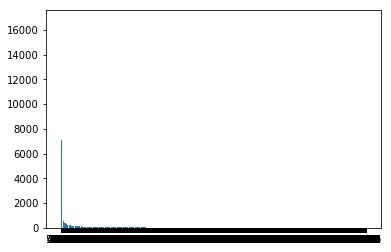

In [53]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

word_list = test_tokens

counts = Counter(word_list)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

In [63]:
labels[:1000]

array([  168,     8, 50509,     1,   594,     5,     4,     7,   366,
          11,    14,    15,   679,   356,     3,     6,  5977,    13,
         469,    93,   141,   315,   759,    18,   726,    28,    17,
        1686,  1208,    59,   418,    26,    34,    65,  2365, 47369,
           2,   360,    55,    31,   156,    86,  3213,  1201,   249,
        2849,  3936,   107,   220,   460,    24,   136,    12,  2573,
          51,    77,   290,  1083,  2779,   551,  1566,   250, 28624,
          72,  2043,    84,  1486,    44, 49350,   212,    38,  3880,
          92,  2513,   218,   562,  4212,    35,   374,  1546,   197,
         192,    88,   196,    16,   180,  2001,   152,    98,   235,
         166,   371,    89,  3473,   184,  2522,  2782,   465,   549,
        1380, 16375,    49,   830, 12203,     9,    70,    46,    22,
         274,  1175,   530,  4238,   137,   659,  1440,   163,   159,
         330,   965,   135,   643,   146,   367,   108,   814,   272,
        6675,   306,

In [65]:
values[:5000]

array([16748, 16216, 15207, ...,    18,    18,    18])

In [61]:
list(values)

[16748,
 16216,
 15207,
 12632,
 12559,
 12016,
 11031,
 10157,
 9487,
 8855,
 7127,
 4618,
 4028,
 3748,
 3531,
 3308,
 3196,
 3089,
 2914,
 2476,
 2202,
 2052,
 1976,
 1947,
 1910,
 1891,
 1730,
 1541,
 1502,
 1488,
 1453,
 1432,
 1422,
 1364,
 1287,
 1280,
 1275,
 1235,
 1208,
 1173,
 1163,
 1157,
 1125,
 1091,
 1087,
 1082,
 1074,
 1056,
 1036,
 1028,
 1012,
 960,
 937,
 900,
 886,
 884,
 865,
 851,
 849,
 846,
 837,
 829,
 803,
 794,
 785,
 778,
 764,
 747,
 728,
 726,
 725,
 692,
 677,
 671,
 641,
 634,
 619,
 619,
 617,
 611,
 608,
 607,
 603,
 602,
 600,
 597,
 592,
 590,
 581,
 572,
 570,
 565,
 556,
 551,
 549,
 548,
 546,
 540,
 540,
 536,
 529,
 526,
 522,
 521,
 520,
 516,
 510,
 510,
 508,
 508,
 507,
 503,
 500,
 496,
 490,
 488,
 488,
 488,
 485,
 485,
 482,
 480,
 479,
 478,
 477,
 475,
 472,
 472,
 469,
 467,
 466,
 463,
 463,
 462,
 460,
 457,
 456,
 456,
 456,
 448,
 446,
 440,
 436,
 434,
 434,
 431,
 431,
 430,
 429,
 429,
 425,
 425,
 424,
 422,
 419,
 418,
 414,

In [78]:
from keras.layers import Dense, Input, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential
class W2V():
    def __init__(self):
        self.encoder = Sequential()

        self.encoder.add(embedding_layer)
        self.encoder.add(GlobalMaxPooling1D())

w2v = W2V()

In [71]:
inp = Input(shape=(max_len,))
drop = Dropout(1.0)
model = Model(inp, drop(inp))

In [101]:
model.predict(q_july).astype(int)

array([[    0,     0,     0, ...,   451,  4764,  2986],
       [ 3354,    87, 14682, ...,   272,  2994, 26480],
       [    0,     0,     0, ...,     4,  5901, 41148],
       ...,
       [    0,   564,  4966, ...,  1569,     2,  1268],
       [    0,     0,     0, ...,     7,  2277,  3008],
       [    0,     0,     0, ...,   587,   249,  2063]])

In [70]:
encoder = Sequential()

encoder.add(embedding_layer)
encoder.add(GlobalAveragePooling1D())

ValueError: A layer added to a Sequential model must not already be connected somewhere else. Model received layer embedding_2 which has 25 pre-existing inbound connections.

In [10]:
evaluate(encoder, test_set)

(0.5147147202369183, 0.8371547445295584, 0.5832573550668237)

In [12]:
evaluate(encoder, test_set)

(0.5237150474333905, 0.8425962550704119, 0.5428072672285352)

In [34]:
inp = Input(shape=(max_len,))
x_max = GlobalMaxPooling1D()(embedding_layer(inp))
x_avg = GlobalAveragePooling1D()(embedding_layer(inp))
m = merge([x_max, x_avg])
both = Model(inp, m)

In [35]:
evaluate(both, test_set)

(0.5187978233186405, 0.841557671534384, 0.5808001067401988)

In [18]:
evaluate(both, test_set)

(0.5159227314797818, 0.8414010452141721, 0.5800885054148412)

In [82]:
w2v.encoder.predict

<bound method Sequential.predict of <keras.models.Sequential object at 0x7fc565166eb8>>

In [23]:
test_tokens = np.unique(np.concatenate([q_july, d_july, q_may, d_may, q_june, d_june]))

In [3]:
%%time
count = 0
file = open("/work/workspace/Texygen/data/1M_Query_GAN", "a+") 
with open ("/data/chzho/deepqts/train_data/unifiedclick/join_oneyearsample_2B_training_all_top10", "r") as myfile:
    for line in myfile:
        s = line.split("\t")
        market = s[5]
        if "en-" not in market:
            continue
        
#         re.sub(r'\W+', ' ', s[1].lower())
#         file.write("%s\t%s\t%s\n" % (s[0], re.sub(r'\W+', ' ', s[1].lower()), re.sub(r'\W+', ' ', s[3].lower())))

        count = count + 1

        if count > 1000000:
            break
        break
file.close()

CPU times: user 22min 23s, sys: 1min 22s, total: 23min 46s
Wall time: 29min 14s


In [68]:
%%time
count = 0
file = open("/work/data/train_data/QueryQueryLog", "a+") 
query = []
with open ("/work/data/train_data/1M_EN_QQ_log", "r") as myfile:
    for line in myfile:
        s = line.replace("\n", "").split("\t")
#         print(line)
        if len(s) < 2:
            continue
        tmp = s[1].split("<sep>")
        
        __ = re.sub(r'\W+', ' ', s[0].lower())
        for i in tmp:
            _ = re.sub(r'\W+', ' ', i.lower())
            
            file.write(__+"\t"+_+"\t1\n")
        
file.close()

CPU times: user 27 s, sys: 376 ms, total: 27.4 s
Wall time: 27.6 s


In [13]:
df = pd.read_csv("/data/chzho/deepqts/train_data/unifiedclick/join_oneyearsample_2B_training_all_top10", nrows=1000, sep="\t", header=None, names=['label', 'q', 'd', 'lang'], usecols=[0,1,3,5])


In [14]:
df[df['lang'].str.contains("en")]

,label,q,d,lang
0,1,facebook log in,Log into Facebook | Facebook,en-us
1,1,utrgv edinburg map,UTRGV Edinburg Campus Map - University of Texa...,en-us
2,1,things to do in miles city mt,The Top 5 Things to Do in Miles City 2017 - Mu...,en-us
3,0,vintagemalebeef,Beefcake - Wikipedia,en-au
4,1,bialik college call for papers,THE CONFERENCE THEME IS: How do we ... - Biali...,en-au
6,1,touran 2 0 sport leather interior,VOLKSWAGEN TOURAN SPORT 2.0 DIESEL 2004 54REG ...,en-gb
9,1,houston chronicle,Houston Chronicle - Official Site,en-us
11,1,youtube,YouTube,en-us
13,0,pregantwoman,"Pregnant Woman Pictures, Images & Photos | Pho...",en-ie
14,1,white house tours,The White House Tour - President's Park (White...,en-us


In [16]:
for q, d, l in zip(df.q.tolist(), df.d.tolist(), df.label.tolist()):
    print(q,d,l)

facebook log in Log into Facebook | Facebook 1
utrgv edinburg map UTRGV Edinburg Campus Map - University of Texas at Brownsville 1
things to do in miles city mt The Top 5 Things to Do in Miles City 2017 - Must See ... 1
vintagemalebeef Beefcake - Wikipedia 0
bialik college call for papers THE CONFERENCE THEME IS: How do we ... - Bialik College 1
fotos krautinger Wildschönau Krautinger-Woche 1
touran 2 0 sport leather interior VOLKSWAGEN TOURAN SPORT 2.0 DIESEL 2004 54REG LEATHER ... 1
dr schütte internist nürnberg Dr.med. Torsten Schütte in Nürnberg Rennweg - Öffnungszeiten 0
ejercicios de combinatoria resueltos 4o eso TEMA 10 – COMBINATORIA 1
houston chronicle Houston Chronicle - Official Site 1
kalender 2018 Kalender 2018 + Ferien Nordrhein-Westfalen, Feiertage 0
youtube YouTube 1
que es la descomposición polinómica de dijitos Descomposición Polinómica de un Número - Ejercicios ... 0
pregantwoman Pregnant Woman Pictures, Images & Photos | Photobucket 0
white house tours The White Hou

In [11]:
%%time
count = 0
file = open("/work/data/train_data/100M", "a+") 
query = []
with open ("/data/chzho/deepqts/train_data/unifiedclick/join_oneyearsample_2B_training_all_top10", "r") as myfile:
    for line in myfile:
        s = line.replace("\n", "").split("\t")
        lang = s[5]
        if "en" not in lang:
            continue
        label = s[0]
        q = re.sub(r'\W+', ' ', s[1].lower())
        d = re.sub(r'\W+', ' ', s[3].lower())
#         print(label, q, d)
        
        count += 1
        if count == 100000:
            break
        
file.close()

CPU times: user 4.22 s, sys: 236 ms, total: 4.45 s
Wall time: 7.32 s


In [ ]:
%%time
count = 0
file = open("/work/data/train_data/QueryLogBPE", "a+") 
query = []
with open ("/work/data/train_data/", "r") as myfile:
    for line in myfile:
        s = line.replace("\n", "").split("\t")
        print(line)
        if len(s) < 2:
            continue
        tmp = s[1].split("<sep>")
        
        __ = re.sub(r'\W+', ' ', s[0].lower())
        for i in tmp:
            _ = re.sub(r'\W+', ' ', i.lower())
            
            file.write(__+"\t"+_+"\t1\n")
        
        
file.close()

In [ ]:
%%time
count = 0
file = open("/work/data/train_data/QueryLogBPE", "a+") 
query = []
with open ("/work/data/train_data/", "r") as myfile:
    for line in myfile:
        s = line.replace("\n", "").split("\t")
#         print(line)
        if len(s) < 2:
            continue
        tmp = s[1].split("<sep>")
        
        __ = re.sub(r'\W+', ' ', s[0].lower())
        for i in tmp:
            _ = re.sub(r'\W+', ' ', i.lower())
            
            file.write(__+"\t"+_+"\t1\n")
        
file.close()

In [42]:
df = pd.read_csv("/work/data/train_data/QueryLog", names=["q"], sep="\t", header=None, error_bad_lines=False)


In [65]:
%%time
df_bpe_token = set([])
for i in df.q.tolist():
    for j in sp.EncodeAsPieces(i):
        df_bpe_token.add(j)


CPU times: user 1min 41s, sys: 696 ms, total: 1min 42s
Wall time: 1min 41s


In [124]:
len(df_token)

561556

In [45]:
df_token = set([])
july_token = set([])

for i in df.q.tolist():
    for j in i.split():
        df_token.add(j)


In [47]:
df_may, qrel_may = get_test_data("MayFlower", "/work/")
df_june, qrel_june = get_test_data("JuneFlower", "/work/")
df_july, qrel_july = get_test_data("JulyFlower", "/work/")

b'Skipping line 19898: expected 6 fields, saw 8\nSkipping line 20620: expected 6 fields, saw 8\nSkipping line 38039: expected 6 fields, saw 8\n'


In [64]:
print("Term Overlap between train and test dataset. QueryLog")
for a in [df_may, df_june, df_july]:
    token = set([])
    for i in a.q.tolist() + a.d.tolist():
        for j in i.split():
            token.add(j)
    print(len(token))
    print(len(df_token.intersection(token)))

Term Overlap between train and test dataset. QueryLog
12853
9648
13351
8799
1372
1310


In [66]:
print("BPE tokens overlap between train and test dataset. QueryLog")
for a in [df_may, df_june, df_july]:
    token = set([])
    for i in a.q.tolist() + a.d.tolist():
        for j in sp.EncodeAsPieces(i):
            token.add(j)
    print(len(token))
    print(len(df_bpe_token.intersection(token)))

BPE tokens overlap between train and test dataset. QueryLog
11276
10734
10280
10162
1556
1525


In [47]:
path = "/work/"
train_data = "30M_QD_ml15"
q_enc_inputs = np.load('%sdata/train_data/%s.q.npy' % (path,train_data))[:10000000]
q_dec_inputs = np.load('%sdata/train_data/%s.q.di.npy' % (path,train_data))[:10000000]
q_dec_outputs = np.load('%sdata/train_data/%s.q.do.npy' % (path,train_data))[:10000000]

d_enc_inputs = np.load('%sdata/train_data/%s.d.npy' % (path,train_data))[:10000000]
d_dec_inputs = np.load('%sdata/train_data/%s.d.di.npy' % (path,train_data))[:10000000]
d_dec_outputs = np.load('%sdata/train_data/%s.d.do.npy' % (path,train_data))[:10000000]

labels = np.load('%sdata/train_data/%s.label.npy' % (path,train_data))[:10000000]

In [48]:
np.save("/work/data/train_data/10M_QD_ml15.q.npy", q_enc_inputs)
np.save("/work/data/train_data/10M_QD_ml15.d.npy", d_enc_inputs)
np.save("/work/data/train_data/10M_QD_ml15.label.npy", labels)

np.save("/work/data/train_data/10M_QD_ml15.q.di.npy", q_dec_inputs)
np.save("/work/data/train_data/10M_QD_ml15.d.di.npy", d_dec_inputs)

np.save("/work/data/train_data/10M_QD_ml15.q.do.npy", q_dec_outputs)
np.save("/work/data/train_data/10M_QD_ml15.d.do.npy", d_dec_outputs)
